In [90]:
import pandas as pd

In [91]:
df_Fake = pd.read_csv('Fake.csv')
df_True = pd.read_csv('True.csv')

In [92]:
df_Fake['Fake'] = 1
df_True['Fake'] = 0

In [93]:
Fake_News_Data = pd.concat([df_Fake, df_True])

In [94]:
Fake_News_Data = Fake_News_Data.loc[: , ['Fake', 'title', 'text', 'date'] ]

In [95]:
Fake_News_Data.index = range(0 , len(Fake_News_Data))

Fake = 1 --> yes 

Fake = 0 --> no

In [96]:
Fake_News_Data.dtypes

Fake      int64
title    object
text     object
date     object
dtype: object

In [97]:
Fake_News_Data['Fake'] = Fake_News_Data['Fake'].astype('object')

In [98]:
Fake_News_Data.describe(include='all')

,Fake,title,text,date
count,44898,44898,44898,44898
unique,2,38729,38646,2397
top,1,Factbox: Trump fills top jobs for his administ...,,"December 20, 2017"
freq,23481,14,627,182


In [99]:
Fake_News_Data.isnull().sum()

Fake     0
title    0
text     0
date     0
dtype: int64

In [100]:
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(8,8)})

In [101]:
prop_Fake_yes = len( Fake_News_Data.loc[ Fake_News_Data['Fake']== 1 , :] ) / len(Fake_News_Data)

prop_Fake_no = len( Fake_News_Data.loc[ Fake_News_Data['Fake']== 0 , :] ) / len(Fake_News_Data)

In [102]:
Fake_News_Data['proportion_Fakes'] = 0


for i in range(0, len(Fake_News_Data)):

    if Fake_News_Data['Fake'][i] == 1 :

        Fake_News_Data['proportion_Fakes'][i] = prop_Fake_yes

    else :

        Fake_News_Data['proportion_Fakes'][i] = prop_Fake_no

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19324\2699169446.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fake_News_Data['proportion_Fakes'][i] = prop_Fake_yes


[Text(0.5, 0, 'Fakes'), Text(0, 0.5, 'proportion')]

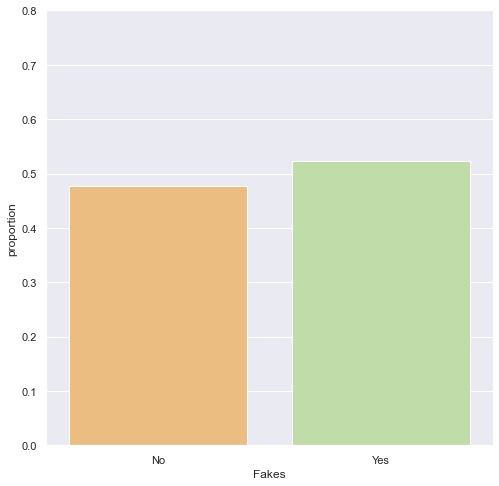

In [103]:
p1 = sns.barplot(x='Fake', y='proportion_Fakes', data=Fake_News_Data, palette="Spectral") 
p1.set_yticks( np.arange(0, 0.85, 0.1)  )
p1.set_xticklabels(['No', 'Yes'])
p1.axes.set(xlabel='Fakes', ylabel='proportion')

In [104]:
[prop_Fake_no , prop_Fake_yes]

[0.47701456635039424, 0.5229854336496058]

In [105]:
[prop_Fake_no*len(Fake_News_Data) , prop_Fake_yes*len(Fake_News_Data)]

[21417.0, 23481.0]

In [106]:
Fake_News_Data = Fake_News_Data.loc[ : , Fake_News_Data.columns != 'proportion_Fakes']

In [107]:
Fake_News_Data['word_count'] = Fake_News_Data['text'].str.split().str.len()

In [108]:
Fake_News_Data

,Fake,title,text,date,word_count
0,1,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017",495
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017",305
2,1,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017",580
3,1,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017",444
4,1,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017",420
...,...,...,...,...,...
44893,0,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,"August 22, 2017",466
44894,0,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...","August 22, 2017",125
44895,0,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,"August 22, 2017",320
44896,0,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,"August 22, 2017",205


In [109]:
Fake_News_Data.groupby('Fake')['word_count'].mean()

Fake
0    385.640099
1    423.197905
Name: word_count, dtype: float64

In [110]:
def limpiar_tokenizar(texto):

    import re
    
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''
    
    # Se convierte todo el texto a minúsculas

    nuevo_texto = texto.lower()
    
    # Eliminación de páginas web (palabras que empiezan por "http")
    
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    
    # Eliminación de signos de puntuación
    
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    
    # Eliminación de números
    
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    
    # Eliminación de espacios en blanco múltiples
    
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    
    # Tokenización por palabras individuales
    
    nuevo_texto = nuevo_texto.split(sep = ' ')
    
    # Eliminación de tokens con una longitud <= 1
    
    nuevo_texto = [token for token in nuevo_texto if len(token) >=  2]
    
    return(nuevo_texto)

In [111]:

test = "Esto es 1 ejemplo de l'limpieza de6 TEXTO  https://t.co/rnHPgyhx4Z @cienciadedatos #textmining"

print(limpiar_tokenizar(texto=test))

['esto', 'es', 'ejemplo', 'de', 'limpieza', 'de', 'texto', 'cienciadedatos', 'textmining']


In [112]:
Fake_News_Data['text'][0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [113]:
print(limpiar_tokenizar(texto=Fake_News_Data['text'][0]))

['donald', 'trump', 'just', 'couldn', 'wish', 'all', 'americans', 'happy', 'new', 'year', 'and', 'leave', 'it', 'at', 'that', 'instead', 'he', 'had', 'to', 'give', 'shout', 'out', 'to', 'his', 'enemies', 'haters', 'and', 'the', 'very', 'dishonest', 'fake', 'news', 'media', 'the', 'former', 'reality', 'show', 'star', 'had', 'just', 'one', 'job', 'to', 'do', 'and', 'he', 'couldn', 'do', 'it', 'as', 'our', 'country', 'rapidly', 'grows', 'stronger', 'and', 'smarter', 'want', 'to', 'wish', 'all', 'of', 'my', 'friends', 'supporters', 'enemies', 'haters', 'and', 'even', 'the', 'very', 'dishonest', 'fake', 'news', 'media', 'happy', 'and', 'healthy', 'new', 'year', 'president', 'angry', 'pants', 'tweeted', 'will', 'be', 'great', 'year', 'for', 'america', 'as', 'our', 'country', 'rapidly', 'grows', 'stronger', 'and', 'smarter', 'want', 'to', 'wish', 'all', 'of', 'my', 'friends', 'supporters', 'enemies', 'haters', 'and', 'even', 'the', 'very', 'dishonest', 'fake', 'news', 'media', 'happy', 'and',

In [114]:
Fake_News_Data['text_tokenizado'] = Fake_News_Data['text'].apply( limpiar_tokenizar )

In [115]:
Fake_News_Data['id_text'] = range(0, len(Fake_News_Data))

In [116]:
Fake_News_Data

,Fake,title,text,date,word_count,text_tokenizado,id_text
0,1,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017",495,"[donald, trump, just, couldn, wish, all, ameri...",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017",305,"[house, intelligence, committee, chairman, dev...",1
2,1,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017",580,"[on, friday, it, was, revealed, that, former, ...",2
3,1,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017",444,"[on, christmas, day, donald, trump, announced,...",3
4,1,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017",420,"[pope, francis, used, his, annual, christmas, ...",4
...,...,...,...,...,...,...,...
44893,0,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,"August 22, 2017",466,"[brussels, reuters, nato, allies, on, tuesday,...",44893
44894,0,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...","August 22, 2017",125,"[london, reuters, lexisnexis, provider, of, le...",44894
44895,0,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,"August 22, 2017",320,"[minsk, reuters, in, the, shadow, of, disused,...",44895
44896,0,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,"August 22, 2017",205,"[moscow, reuters, vatican, secretary, of, stat...",44896


In [117]:
Fake_News_Tokens = Fake_News_Data.loc[:, ['id_text', 'text_tokenizado', 'Fake'] ].explode(column='text_tokenizado')

Fake_News_Tokens = Fake_News_Tokens.rename(columns={'text_tokenizado':'token'})

In [118]:
Fake_News_Tokens

,id_text,token,Fake
0,0,donald,1
0,0,trump,1
0,0,just,1
0,0,couldn,1
0,0,wish,1
...,...,...,...
44897,44897,technology,0
44897,44897,and,0
44897,44897,aviation,0
44897,44897,among,0


In [119]:
# nº de palabras (tokens) en el conjunto de textos clasificados como fake y en los no fake

Fake_News_Tokens.groupby(by='Fake')['token'].count()

Fake
0    7891501
1    9611544
Name: token, dtype: int64

In [120]:
# nº de palabras (tokens) unicas en el conjunto de textos clasificados como fake y en los no fake

Fake_News_Tokens.groupby(by='Fake')['token'].nunique()

Fake
0    78020
1    85642
Name: token, dtype: int64

In [121]:
# nº de palabras (tokens) en cada texto individual clasificados como fake y en los no fake

df1 = pd.DataFrame( Fake_News_Tokens.groupby(by = ["id_text" , "Fake"] )["token"].count().rename('nº_tokens') )

In [122]:
df1

,,nº_tokens
id_text,Fake,
0,1,447
1,1,294
2,1,563
3,1,426
4,1,415
...,...,...
44893,0,433
44894,0,120
44895,0,307


In [123]:
df2 = df1.loc[df1['nº_tokens'] != 0, :]

In [124]:
df2

,,nº_tokens
id_text,Fake,
0,1,447
1,1,294
2,1,563
3,1,426
4,1,415
...,...,...
44893,0,433
44894,0,120
44895,0,307


In [125]:
df2.groupby("Fake")["nº_tokens"].agg(['mean'])

,mean
Fake,
0,368.486225
1,422.169983


Otra forma de hacer lo anterior (longitud media de las noticias fake y no fake)

In [126]:
m0 = ( Fake_News_Tokens.loc[Fake_News_Tokens['Fake']==0].groupby('id_text')['token'].count() ).mean()

In [127]:
m1 = ( Fake_News_Tokens.loc[Fake_News_Tokens['Fake']==1].groupby('id_text')['token'].count() ).mean()

In [128]:
pd.DataFrame({'fake_new': [0,1] , 'tokens_mean':[m0 , m1]})

,fake_new,tokens_mean
0,0,368.469020
1,1,409.332822


In [129]:
df = pd.DataFrame(  (Fake_News_Tokens.groupby(by = ["Fake", "token"] )["token"].count().unstack(fill_value=0).stack().reset_index(name='frecuencia_token')))

# .unstack(fill_value=0).stack() para que tambien aparezcan los tokens con count = 0 , si no solo aprecerian los que tienen count > 0.

In [130]:
df # Nos da el nº de veces que sale cada token en el conjunto de las noticas fake y por otro lado en el de las no fake (solo salen tokens con count > 0 )

,Fake,token,frecuencia_token
0,0,aa,22
1,0,aaa,7
2,0,aaaaaaaand,0
3,0,aaaaackkk,0
4,0,aaaaapkfhk,0
...,...,...,...
251605,1,””it,0
251606,1,””when,0
251607,1,•if,0
251608,1,☑️,0


In [131]:
df.loc[df['token']=='yes' , ] # El token 'yes' aprece 1775 veces en el conjunto de las fake news y 336 en el de las no fake news

,Fake,token,frecuencia_token
116577,0,yes,336
242382,1,yes,1775


In [132]:
df.loc[df['token']=='true' , ] # El token 'true' aparece 2595 veces en el conjunto de las fake news y 412 en el de las no fake news

,Fake,token,frecuencia_token
106608,0,true,412
232413,1,true,2595


In [133]:
df.loc[df['Fake']==0 , ] # frecuencia de tokens en el conjunto de las no fake news

,Fake,token,frecuencia_token
0,0,aa,22
1,0,aaa,7
2,0,aaaaaaaand,0
3,0,aaaaackkk,0
4,0,aaaaapkfhk,0
...,...,...,...
125800,0,””it,1
125801,0,””when,1
125802,0,•if,3
125803,0,☑️,3


In [134]:
df.loc[df['Fake']==1 , ] # nº de tokens en el conjunto de las fake news

,Fake,token,frecuencia_token
125805,1,aa,24
125806,1,aaa,9
125807,1,aaaaaaaand,1
125808,1,aaaaackkk,1
125809,1,aaaaapkfhk,1
...,...,...,...
251605,1,””it,0
251606,1,””when,0
251607,1,•if,0
251608,1,☑️,0


In [135]:
df_fake_sort = df.loc[df['Fake']==1 , ].sort_values(by=["frecuencia_token"], ascending=False).reset_index(drop=False)

In [136]:
df_no_fake_sort = df.loc[df['Fake']==0 , ].sort_values(by=["frecuencia_token"], ascending=False).reset_index(drop=False)

In [137]:
df_fake_sort.head(15)

,index,Fake,token,frecuencia_token
0,229301,1,the,544521
1,230713,1,to,290882
2,199217,1,of,236735
3,129697,1,and,227349
4,174372,1,in,171433
5,229261,1,that,151789
6,176603,1,is,111278
7,162672,1,for,93538
8,176868,1,it,83693
9,199777,1,on,83661


In [138]:
df_no_fake_sort.head(15)

,index,Fake,token,frecuencia_token
0,103496,0,the,478548
1,104908,0,to,245378
2,73412,0,of,205193
3,3892,0,and,181715
4,48567,0,in,181082
5,73972,0,on,108459
6,90350,0,said,99054
7,103456,0,that,86723
8,36867,0,for,79705
9,50798,0,is,55298


En la tabla anterior puede observarse que los términos más frecuentes en todos los usuarios se corresponden con artículos, preposiciones, pronombres…, en general, palabras que no aportan información relevante sobre el texto. Ha estas palabras se les conoce como stopwords. Para cada idioma existen distintos listados de stopwords, además, dependiendo del contexto, puede ser necesario adaptar el listado. Por ejemplo, en la tabla anterior aparece el término amp que procede de la etiqueta html &amp. Con frecuencia, a medida que se realiza un análisis se encuentran palabras que deben incluirse en el listado de stopwords.

In [139]:
# pip install nltk

In [140]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [141]:
# Obtención de listado de stopwords del inglés
# ==============================================================================

stop_words = stopwords.words('english') + ["pic" , "getty", "quot", "acr", "filessupport", "flickr", "fjs", "js", "somodevilla", "var", "henningsen",
"ck", "cdata", "subscribing", "mcnamee", "amp", "wfb", "screenshot", "hesher","nyp", "cking", "helton", "raedle", "donnell",
"getelementbyid", "src", "behar", "createelement", "getelementsbytagname", "parentnode", "wnd","insertbefore",
"jssdk", "nowicki", "xfbml", "camerota", "sdk",  "“i" , "“the", "“we", "it’s", "don’t", "“this", "“it", "“a",
"“if",  "“it’s", "we’re", "that’s",  "“he", "“there", "i’m",  "he’s",  "“we’re", "doesn’t", "can’t", "“i’m", "“in",
"suu", "“they", "you’re", "“but", "didn’t", "“you", "they’re", "“no", "“as", "“very" , "there’s", "“what",  "“and", "won’t",
  "“to", "“that", "“one", "we’ve", "“when" , "“our", "“not", "’”" ,"“that’s", "“these", "“there’s", "“he’s", "we’ll", 'one',
   'would', 'like', 'us', 'even', 'could', 'two', 'many', 'angerer', 'reilly']

In [142]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [143]:
df_fake_sort_not_StopWords = df_fake_sort[ ~ df_fake_sort['token'].isin(stop_words) ] # ranking de tokens para las fake news sin stop words

In [144]:
df_no_fake_sort_not_StopWords = df_no_fake_sort[ ~ df_no_fake_sort['token'].isin(stop_words) ] # ranking de tokens para las no fake news sin stop words

In [145]:
df_fake_sort_not_StopWords.head(15)

,index,Fake,token,frecuencia_token
10,232444,1,trump,79922
31,216155,1,said,33763
34,206880,1,president,27801
35,203392,1,people,26591
56,144568,1,clinton,19209
59,198761,1,obama,18833
62,154174,1,donald,17789
67,128977,1,also,15420
69,196554,1,news,14688
73,196507,1,new,14414


In [146]:
df_no_fake_sort_not_StopWords.head(15)

,index,Fake,token,frecuencia_token
6,90350,0,said,99054
17,106639,0,trump,42755
26,87534,0,reuters,28880
28,81075,0,president,27128
36,98622,0,state,19912
41,41076,0,government,18484
44,70702,0,new,16849
47,46493,0,house,16480
48,98655,0,states,16380
49,86922,0,republican,16175


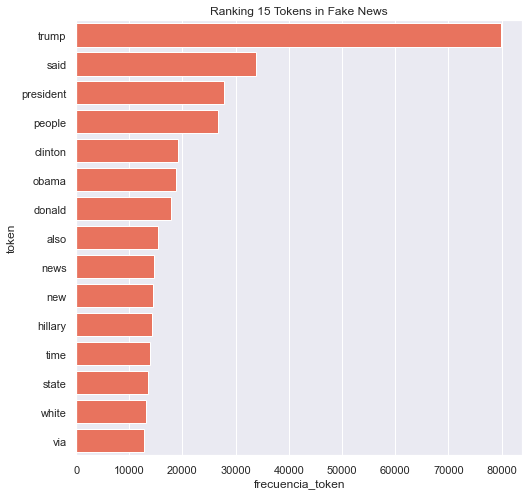

In [147]:
p1 = sns.barplot(data=df_fake_sort_not_StopWords.head(15), x='frecuencia_token', y='token', color='tomato').set(title='Ranking 15 Tokens in Fake News') 

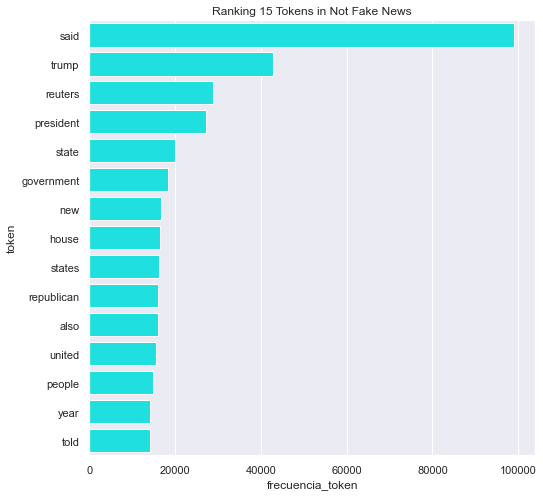

In [148]:
p2 = sns.barplot(data=df_no_fake_sort_not_StopWords.head(15), x='frecuencia_token', y='token', color='cyan').set(title='Ranking 15 Tokens in Not Fake News') 

A continuación, se estudia qué palabras se utilizan de forma más diferenciada en cada tipo de noticia (fake / no fake), es decir, palabras que utiliza mucho en fake newa y que no se utilizan en las no fakes, y viceversa. 

Una forma de hacer este análisis es mediante el odds ratio de las frecuencias.

$$\dfrac{ \frac{n_{k0} + 1}{N_0 + 1} }{  \frac{n_{k1} + 1}{N_1 +1}  }$$
 
Donde:

$n_{k0}$  el número de veces que aparece el término (token) k en las fake news  

$n_{k1}$ el numero de veces  que aparece el termino (token) k en las no fake news.

$N_0$ es el número de terminos (tokens, contando repeticiones) que aparecen en las fake news 

$N_1$ es el número de terminos (tokens, contando repeticiones) que aparecen en las no fake news 

In [149]:
def n_k1(token) : 

    n_k1 = df_fake_sort_not_StopWords.loc[ df_fake_sort_not_StopWords['token']==token , 'frecuencia_token']

    return(n_k1)

In [150]:
def n_k0(token) : 

    n_k0 = df_no_fake_sort_not_StopWords.loc[ df_no_fake_sort_not_StopWords['token']==token , 'frecuencia_token']

    return(n_k0)

In [151]:
n_k0('trump') 

17    42755
Name: frecuencia_token, dtype: int64

In [152]:
n_k1('trump') 

10    79922
Name: frecuencia_token, dtype: int64

N_0 y N_1 coinciden con el nº de tokens (contando repeticiones , y sin stops words) que aparecen el las no fake  y  fake news, respectivamente:

In [153]:
Fake_News_Tokens_not_StopWords = Fake_News_Tokens[ ~ Fake_News_Tokens['token'].isin(stop_words) ]

In [154]:
N0 = Fake_News_Tokens_not_StopWords.groupby(by='Fake')['token'].count()[0]

N1 = Fake_News_Tokens_not_StopWords.groupby(by='Fake')['token'].count()[1]

In [155]:
N0

4782200

In [156]:
N1

5397571

In [157]:
Fake_News_Tokens_not_StopWords.groupby(by='Fake')['token'].count()

Fake
0    4782200
1    5397571
Name: token, dtype: int64

In [158]:
n_k0('trump') / N0 

17    0.00894
Name: frecuencia_token, dtype: float64

In [159]:
n_k1('trump') / N1

10    0.014807
Name: frecuencia_token, dtype: float64

In [160]:
float( n_k0('trump') / N0 ) / float( n_k1('trump') / N1 )

0.6037973409655318

In [161]:
df0 = df_fake_sort_not_StopWords.sort_values(by=["token"]).reset_index(drop=True)
df0

,index,Fake,token,frecuencia_token
0,125805,1,aa,24
1,125806,1,aaa,9
2,125807,1,aaaaaaaand,1
3,125808,1,aaaaackkk,1
4,125809,1,aaaaapkfhk,1
...,...,...,...,...
125563,251605,1,””it,0
125564,251606,1,””when,0
125565,251607,1,•if,0
125566,251608,1,☑️,0


In [162]:
df1 = df_no_fake_sort_not_StopWords.sort_values(by=["token"]).reset_index(drop=True)
df1

,index,Fake,token,frecuencia_token
0,0,0,aa,22
1,1,0,aaa,7
2,2,0,aaaaaaaand,0
3,3,0,aaaaackkk,0
4,4,0,aaaaapkfhk,0
...,...,...,...,...
125563,125800,0,””it,1
125564,125801,0,””when,1
125565,125802,0,•if,3
125566,125803,0,☑️,3


In [163]:
n_k0_vector = df0['frecuencia_token']

In [164]:
( n_k0_vector + 1 ) / ( N0 + 1)

0         5.227718e-06
1         2.091087e-06
2         4.182175e-07
3         4.182175e-07
4         4.182175e-07
              ...     
125563    2.091087e-07
125564    2.091087e-07
125565    2.091087e-07
125566    2.091087e-07
125567    2.091087e-07
Name: frecuencia_token, Length: 125568, dtype: float64

In [165]:
n_k1_vector = df1['frecuencia_token']

In [166]:
( n_k1_vector + 1 ) / ( N1 + 1)

0         4.261175e-06
1         1.482148e-06
2         1.852685e-07
3         1.852685e-07
4         1.852685e-07
              ...     
125563    3.705370e-07
125564    3.705370e-07
125565    7.410739e-07
125566    7.410739e-07
125567    3.705370e-07
Name: frecuencia_token, Length: 125568, dtype: float64

In [167]:
Odds_ratio = ( ( n_k0_vector + 1 ) / ( N0 + 1) ) / ( ( n_k1_vector + 1 ) / ( N1 + 1) )

In [168]:
Odds_ratio

0         1.226825
1         1.410849
2         2.257359
3         2.257359
4         2.257359
            ...   
125563    0.564340
125564    0.564340
125565    0.282170
125566    0.282170
125567    0.564340
Name: frecuencia_token, Length: 125568, dtype: float64

In [169]:
df0['Odds_ratio_notFake_Fake'] = Odds_ratio  
df1['Odds_ratio_notFake_Fake'] = Odds_ratio  

In [170]:
df0

,index,Fake,token,frecuencia_token,Odds_ratio_notFake_Fake
0,125805,1,aa,24,1.226825
1,125806,1,aaa,9,1.410849
2,125807,1,aaaaaaaand,1,2.257359
3,125808,1,aaaaackkk,1,2.257359
4,125809,1,aaaaapkfhk,1,2.257359
...,...,...,...,...,...
125563,251605,1,””it,0,0.564340
125564,251606,1,””when,0,0.564340
125565,251607,1,•if,0,0.282170
125566,251608,1,☑️,0,0.282170


In [171]:
df1

,index,Fake,token,frecuencia_token,Odds_ratio_notFake_Fake
0,0,0,aa,22,1.226825
1,1,0,aaa,7,1.410849
2,2,0,aaaaaaaand,0,2.257359
3,3,0,aaaaackkk,0,2.257359
4,4,0,aaaaapkfhk,0,2.257359
...,...,...,...,...,...
125563,125800,0,””it,1,0.564340
125564,125801,0,””when,1,0.564340
125565,125802,0,•if,3,0.282170
125566,125803,0,☑️,3,0.282170


In [180]:
df0 = df0.sort_values(by=["Odds_ratio_notFake_Fake"], ascending=False).reset_index(drop=True).head(15)
df0

,index,Fake,token,frecuencia_token,Odds_ratio_notFake_Fake
0,161635,1,finicum,361,408.581961
1,211908,1,reilly,951,358.167613
2,129864,1,angerer,281,318.287605
3,240069,1,wikimedia,225,255.081556
4,234845,1,uninterruptible,213,241.537403
5,204177,1,philosophers,209,237.022685
6,186516,1,lovable,206,233.636646
7,223735,1,spore,205,232.507967
8,217054,1,savants,205,232.507967
9,193491,1,moralists,205,232.507967


In [182]:
df1 = df1.sort_values(by=["Odds_ratio_notFake_Fake"], ascending=True).reset_index(drop=True).head(15)
df1['Odds_ratio_Fake_notFake'] = 1 / df1["Odds_ratio_notFake_Fake"] 
df1

,index,Fake,token,frecuencia_token,Odds_ratio_notFake_Fake,Odds_ratio_Fake_notFake
0,106864,0,trump’s,11629,0.000097,10304.077024
1,72989,0,obama’s,2132,0.000529,1889.819114
2,18791,0,clinton’s,1604,0.000703,1422.015789
3,76630,0,party’s,1101,0.001024,976.362243
4,98675,0,state’s,1010,0.001116,895.737048
5,81106,0,president’s,904,0.001247,801.821987
6,84132,0,rakhine,897,0.001257,795.620049
7,1245,0,administration’s,765,0.001473,678.669218
8,88808,0,rohingya,2054,0.001648,606.903935
9,118151,0,zuma,682,0.001653,605.131952


In [174]:
### Alternativa computacionalmente mas costosa:

# for token , i in zip( df_fake_sort_sin_StopWords['token'] , range(0, len(df_fake_sort_sin_StopWords)) ):

   # df_fake_sort_sin_StopWords['Odds_ratio_notFake_Fake'][i] = float( (n_k0(token) + 1) / (N0 + 1) ) / float( (n_k1(token) + 1) / (N1 + 1) )

# for token , i in zip( df_no_fake_sort_sin_StopWords['token'] , range(0, len(df_no_fake_sort_sin_StopWords)) ):

   # df_no_fake_sort_sin_StopWords['Odds_ratio_notFake_Fake'][i] = float( (n_k0(token) + 1) / (N0 + 1) ) / float( (n_k1(token) + 1) / (N1 + 1) )

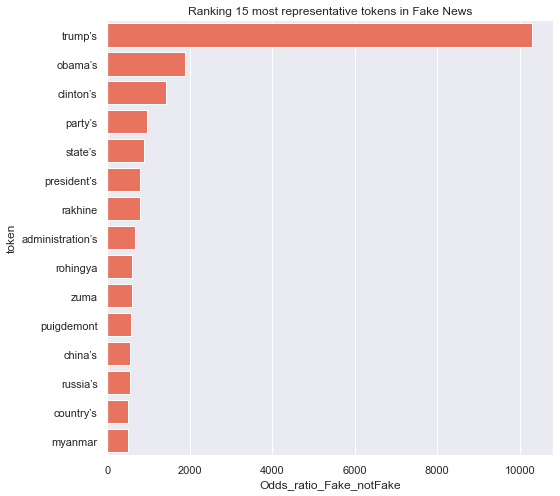

In [183]:
p1 = sns.barplot(data=df1.sort_values(by=["Odds_ratio_notFake_Fake"], ascending=True).reset_index(drop=True).head(15) ,
                 x='Odds_ratio_Fake_notFake', y='token', color='tomato').set(title='Ranking 15 most representative tokens in Fake News') 

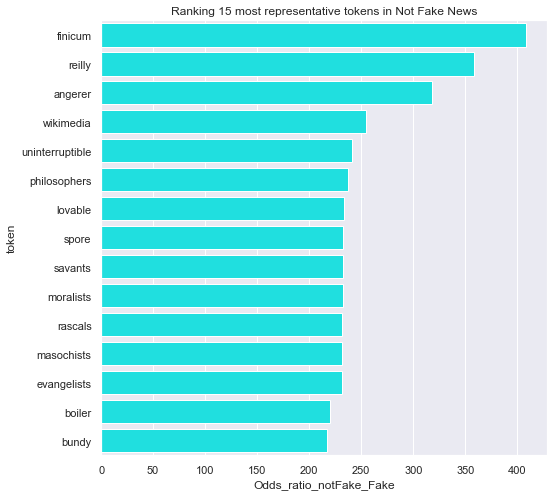

In [184]:
p2 = sns.barplot(data=df0.sort_values(by=["Odds_ratio_notFake_Fake"], ascending=False).reset_index(drop=True).head(15) ,
                 x='Odds_ratio_notFake_Fake', y='token', color='cyan').set(title='Ranking 15 most representative tokens in Not Fake News') 

Uno de los principales intereses en text mining, natural language processing e information retrieval es cuantificar la temática de un texto, así como la importancia de cada término que lo forma. Una manera sencilla de medir la importancia de un término dentro de un documento es utilizando la frecuencia con la que aparece (tf, term-frequency). Esta aproximación, aunque simple, tiene la limitación de atribuir mucha importancia a aquellas palabras que aparecen muchas veces aunque no aporten información selectiva. Por ejemplo, si la palabra matemáticas aparece 5 veces en un documento y la palabra página aparece 50, la segunda tendrá 10 veces más peso a pesar de que no aporte tanta información sobre la temática del documento. Para solucionar este problema se pueden ponderar los valores tf multiplicándolos por la inversa de la frecuencia con la que el término en cuestión aparece en el resto de documentos(idf). De esta forma, se consigue reducir el valor de aquellos términos que aparecen en muchos documentos y que, por lo tanto, no aportan información selectiva.



El estadístico tf-idf mide cómo de informativo es un término en un documento teniendo en cuenta la frecuencia con la que ese término aparece en otros documentos.





Term Frequency (tf)

$$tf (k, d)= \dfrac{n_k}{longitud d}$$
 
donde  $n_k$  es el número de veces que aparece el término  $k$  en el documento  $d$ 



Inverse Document Frequency

$$idf (k)=log(\dfrac{n(d)}{n(d,k)})$$
 
donde  $n(d)$  es el número total de documentos y $n(d,k)$  el número de documentos que contienen el término  $k$ .




Estadístico tf-idf

$$tf-idf(k, d)=tf (k, d)∗idf (k)$$
 





En la práctica, para evitar problemas con el logaritmo cuando aparecen valores de 0, se emplea una versión corregida del  idf (t) . Esta es la versión implementada en Scikit Learn.

$$idf (k)=log(\dfrac{1+n(d)}{1+n(d,k)})+1$$
 


https://www.cienciadedatos.net/documentos/py25-text-mining-python.html